In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
pl.style.use('seaborn-whitegrid')
pl.rcParams['figure.figsize']=10,8
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder

In [64]:
data=pd.read_csv('train.csv')

In [65]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [66]:
data.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [67]:
data.shape

(82657, 12)

In [68]:
data.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [69]:
data1=data.copy()

In [83]:
data1['country']=data1['country'].fillna('Others')
data1['user_name']=data1['user_name'].fillna('Unknown')

In [84]:
data1.isnull().sum()

user_name                 0
country                   0
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [85]:
data1['variety'].nunique(),np.unique(data1['variety'],return_counts=True)

(28,
 (array(['Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
         'Cabernet Franc', 'Cabernet Sauvignon', 'Champagne Blend',
         'Chardonnay', 'Gamay', 'Gewürztraminer', 'Grüner Veltliner',
         'Malbec', 'Merlot', 'Nebbiolo', 'Pinot Grigio', 'Pinot Gris',
         'Pinot Noir', 'Portuguese Red', 'Portuguese White', 'Red Blend',
         'Rhône-style Red Blend', 'Riesling', 'Rosé', 'Sangiovese',
         'Sauvignon Blanc', 'Sparkling Blend', 'Syrah', 'Tempranillo',
         'White Blend', 'Zinfandel'], dtype=object),
  array([ 5497,   850,  1095,  7552,  1133,  9403,   816,   840,  1055,
          2119,  2471,  2242,   873,  1148, 10587,  1969,   896,  7166,
          1182,  4148,  2831,  2165,  4011,  1739,  3316,  1448,  1896,
          2209], dtype=int64)))

In [86]:
data

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
...,...,...,...,...,...,...,...,...,...,...,...,...
82652,@wineschach,Spain,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,84,12.0,Northern Spain,Rioja,NaN,Montecillo,Tempranillo
82653,NaN,US,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,85,21.0,New Mexico,New Mexico,NaN,Vivác Winery,Cabernet Sauvignon
82654,@vossroger,France,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,87,14.0,Beaujolais,Beaujolais-Villages,NaN,Domaine de la Madone,Gamay
82655,@vossroger,France,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",NaN,91,20.0,Bordeaux,Haut-Médoc,NaN,Château Beaumont,Bordeaux-style Red Blend


In [87]:
data1['country'].nunique(),np.unique(data1['country'],return_counts=True)

(39,
 (array(['Argentina', 'Australia', 'Austria', 'Brazil', 'Bulgaria',
         'Canada', 'Chile', 'Croatia', 'Cyprus', 'Czech Republic',
         'England', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
         'India', 'Israel', 'Italy', 'Lebanon', 'Luxembourg', 'Macedonia',
         'Mexico', 'Moldova', 'Morocco', 'New Zealand', 'Others', 'Peru',
         'Portugal', 'Romania', 'Serbia', 'Slovenia', 'South Africa',
         'Spain', 'Switzerland', 'Turkey', 'US', 'Ukraine', 'Uruguay'],
        dtype=object),
  array([ 2570,  1028,  1892,    28,    93,   176,  2891,    12,     6,
             3,    62, 15948,    12,  1573,   139,    35,     1,   320,
          9112,    28,     5,     5,    38,    35,    21,  1121,    35,
             8,  3197,    80,     4,    42,   727,  2755,     5,    33,
         38573,    11,    33], dtype=int64)))

In [88]:
data1['user_name'].nunique(),np.unique(data1['user_name'],return_counts=True)

(16,
 (array(['@AnneInVino', '@JoeCz', '@bkfiona', '@gordone_cellars',
         '@kerinokeefe', '@laurbuzz', '@mattkettmann', '@paulgwine\xa0',
         '@suskostrzewa', '@vboone', '@vossroger', '@wawinereport',
         '@wineschach', '@winewchristina', '@worldwineguys', 'Unknown'],
        dtype=object),
  array([ 2314,  3054,    20,  2768,  5675,  1055,  4298,  6824,   511,
          6908, 17539,  3471,  8320,     4,   503, 19393], dtype=int64)))

In [113]:
data1.head()


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Unknown,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,Unknown,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [114]:
data1['review_description']

0        Classic Chardonnay aromas of apple, pear and h...
1        This wine is near equal parts Syrah and Merlot...
2        Barolo Conca opens with inky dark concentratio...
3        It's impressive what a small addition of Sauvi...
4        This ripe, sweet wine is rich and full of drie...
                               ...                        
82652    Hot earth, baked cherry and mild vanilla aroma...
82653    Pungent, high-pitched notes of turmeric and dr...
82654    This is a wine that's not just lively and frui...
82655    An impressive wine, it already shows signs of ...
82656    A big, rich, vital Cabernet with immediate att...
Name: review_description, Length: 82657, dtype: object

In [517]:
#Feature Selection
# Here only required features are selected:
# Unselected features are:
# 1. user_name: since user_name is the only person who is giving review so it doesnt count on predicting variety of grape 
# 2. review_title: review_title is not a variable that predicts variety of grape
# 3. review_description is also not feature used for prediction
    
    
    
    
    
    
    
data2=data1[['country','points','price','province','winery','variety']]

In [518]:
data2.head()

,country,points,price,province,winery,variety
0,Australia,83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,89,15.0,Washington,North by Northwest,Red Blend
2,Italy,94,80.0,Piedmont,Renato Ratti,Nebbiolo
3,France,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,88,33.0,France Other,Château du Cèdre,Malbec


In [519]:
data2.isnull().sum()

country        0
points         0
price       5569
province      35
winery         0
variety        0
dtype: int64

In [520]:
data2['price']=data2['price'].fillna(np.mean(data2['price']))

Text(0, 0.5, 'Count by Countries')

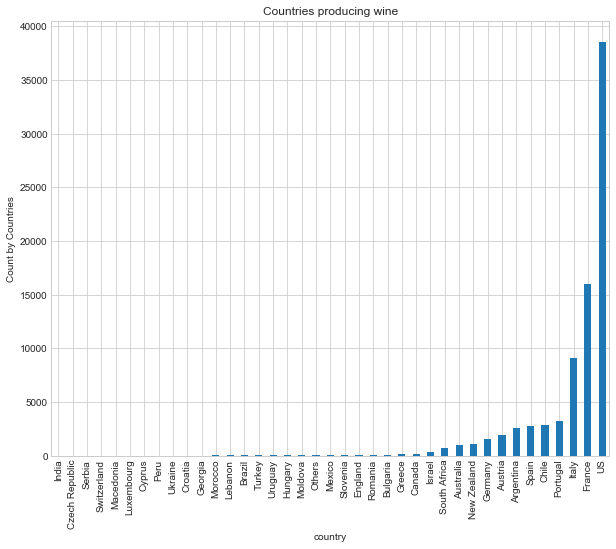

In [521]:
data2.groupby('country')['country'].count().sort_values().plot(kind='bar')
pl.title("Countries producing wine")
pl.ylabel('Count by Countries')

In [522]:
# This code is to extract first word from review description in order to see if this feature class could be useful
#     or not


def process_text(text):
#     1. Remove punctuation
#     2. Remove Stopwords
#     3. Return list of clean words

#     1
    values=[]
    clean_words=[]
    for i in text:
        nonpunc=[char for char in i if char not in string.punctuation]
    #     print(nonpunc)
        nonpunc=''.join(nonpunc)
        values.append(i)
#     print(nonpunc)
#     2
    
    for i in values:
        clean_words.extend(np.array([word for word in i.split() if word.lower() not in stopwords.words('english')][0]).astype(str).reshape(1,-1))
    
#     3
    return clean_words
a=process_text(data1['review_description'].head(10))


In [523]:
for i in a:
    print(i[0])

Classic
wine
Barolo
impressive
ripe,
Strident
Half
High-toned
Displaying
blend


In [524]:
data2.describe()

,points,price
count,82657.000000,82657.000000
mean,88.544564,36.922232
std,3.099649,42.200576
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,29.000000
75%,91.000000,43.000000
max,100.000000,3300.000000


In [525]:
data2.dropna(inplace=True)

In [526]:
data2.isnull().sum()

country     0
points      0
price       0
province    0
winery      0
variety     0
dtype: int64

In [527]:
data2.head()

,country,points,price,province,winery,variety
0,Australia,83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,89,15.0,Washington,North by Northwest,Red Blend
2,Italy,94,80.0,Piedmont,Renato Ratti,Nebbiolo
3,France,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,88,33.0,France Other,Château du Cèdre,Malbec


In [528]:
data2['country'].nunique(),data2['province'].nunique(),data2['winery'].nunique(),data2['variety'].nunique()

(38, 358, 13776, 28)

In [529]:
encoder=LabelEncoder()

In [530]:
# data2['Variety']=encoder.fit_transform(data2['variety'])

In [531]:
data2.head(10)

,country,points,price,province,winery,variety
0,Australia,83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,89,15.0,Washington,North by Northwest,Red Blend
2,Italy,94,80.0,Piedmont,Renato Ratti,Nebbiolo
3,France,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,88,33.0,France Other,Château du Cèdre,Malbec
5,Argentina,85,13.0,Other,Andean,Cabernet Sauvignon
6,US,91,45.0,Washington,Gordon Estate,Red Blend
7,US,90,50.0,California,Rock Wall,Zinfandel
8,US,91,48.0,Oregon,Elizabeth Chambers,Pinot Noir
9,Italy,86,31.0,Tuscany,Mannucci Droandi,Red Blend


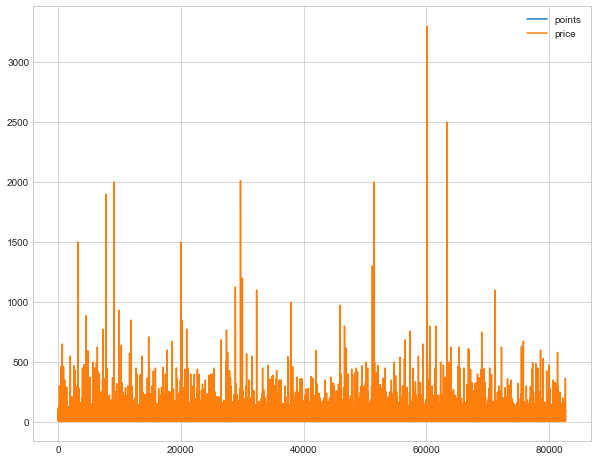

In [532]:
data2.plot()

Text(0.5, 1.0, 'Histogram of point and its distribution')

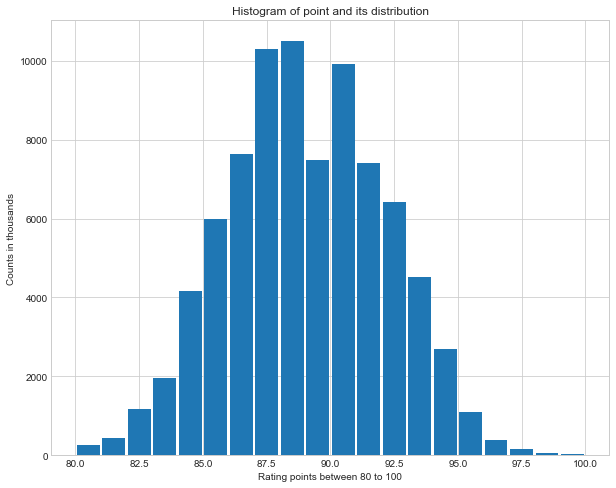

In [533]:
pl.hist(data2['points'],bins=20,rwidth=0.9)
pl.xlabel("Rating points between 80 to 100")
pl.ylabel("Counts in thousands")
pl.title("Histogram of point and its distribution")

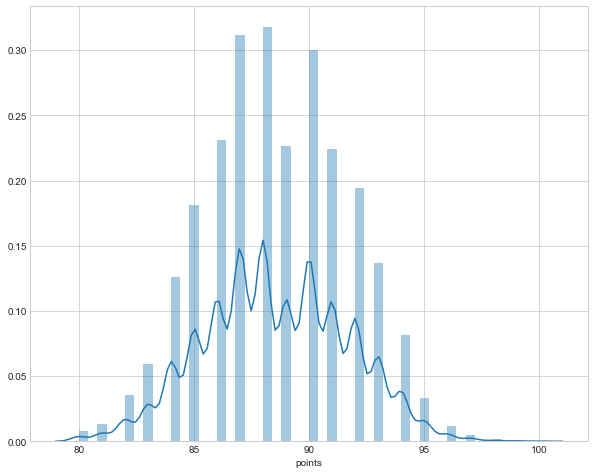

In [534]:
sns.distplot(data2['points'])

Text(0.5, 1.0, '')

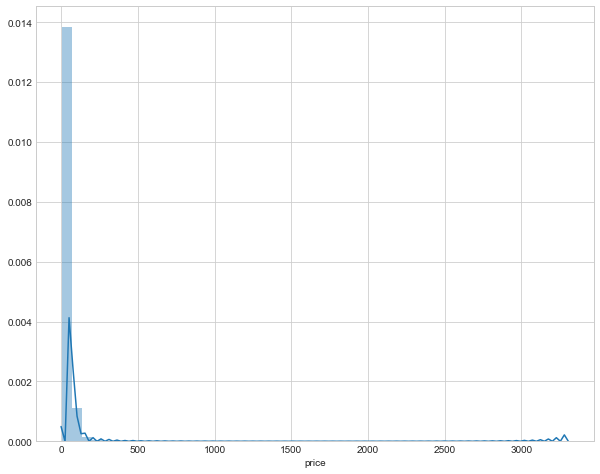

In [535]:
sns.distplot(data2['price'])
pl.title("")

In [548]:
data3=data2.copy()

In [549]:
data3.isnull().sum()

country     0
points      0
price       0
province    0
winery      0
variety     0
dtype: int64

In [550]:
# data3.drop(['winery','variety'],axis=1,inplace=True)

In [551]:
data3

,country,points,price,province,winery,variety
0,Australia,83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,89,15.0,Washington,North by Northwest,Red Blend
2,Italy,94,80.0,Piedmont,Renato Ratti,Nebbiolo
3,France,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,88,33.0,France Other,Château du Cèdre,Malbec
...,...,...,...,...,...,...
82652,Spain,84,12.0,Northern Spain,Montecillo,Tempranillo
82653,US,85,21.0,New Mexico,Vivác Winery,Cabernet Sauvignon
82654,France,87,14.0,Beaujolais,Domaine de la Madone,Gamay
82655,France,91,20.0,Bordeaux,Château Beaumont,Bordeaux-style Red Blend


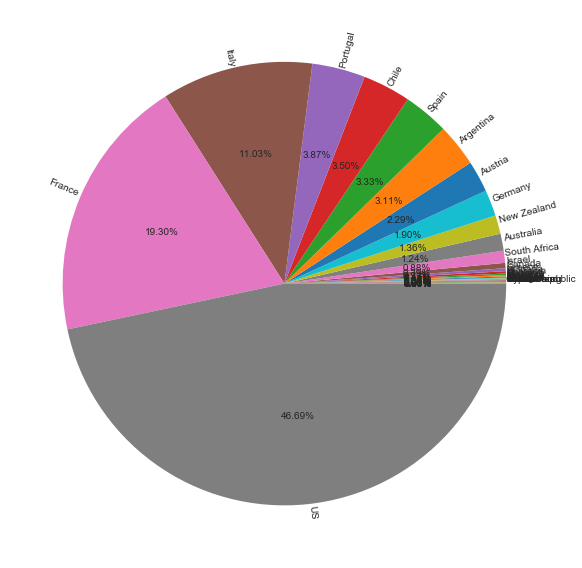

In [552]:
a=data3.groupby('country')['country'].count().sort_values()
pl.pie(a,labels=a.keys(),autopct='%1.2f%%',labeldistance=1,rotatelabels=180)
pl.tight_layout()
pl.show()

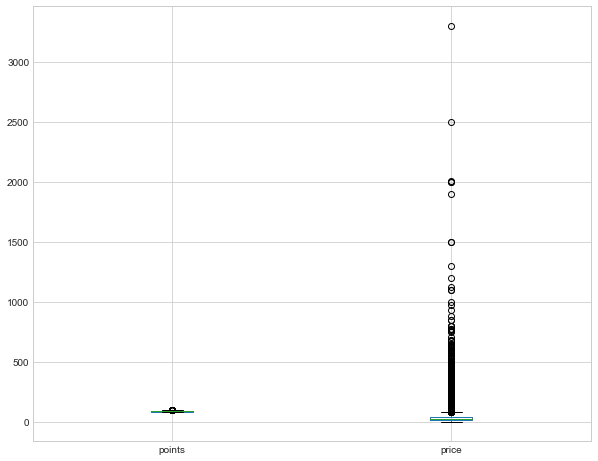

In [553]:
data3.boxplot()

In [554]:
dummy=data3[data3['price']<70]

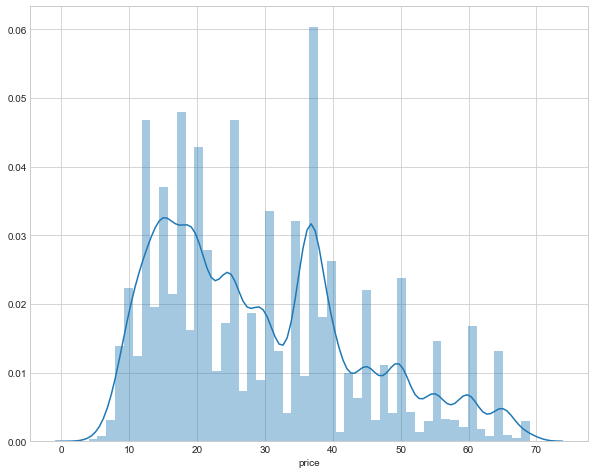

In [555]:
sns.distplot(dummy['price'])

In [556]:
dummy.shape

(75374, 6)

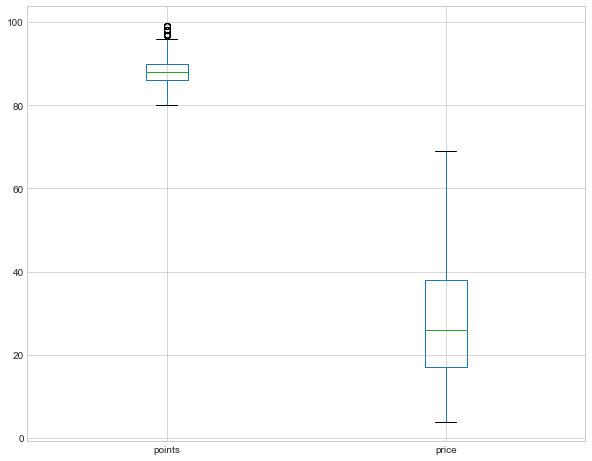

In [557]:
dummy.boxplot()

In [558]:
dummy

,country,points,price,province,winery,variety
0,Australia,83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,89,15.0,Washington,North by Northwest,Red Blend
3,France,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,88,33.0,France Other,Château du Cèdre,Malbec
5,Argentina,85,13.0,Other,Andean,Cabernet Sauvignon
...,...,...,...,...,...,...
82652,Spain,84,12.0,Northern Spain,Montecillo,Tempranillo
82653,US,85,21.0,New Mexico,Vivác Winery,Cabernet Sauvignon
82654,France,87,14.0,Beaujolais,Domaine de la Madone,Gamay
82655,France,91,20.0,Bordeaux,Château Beaumont,Bordeaux-style Red Blend


In [559]:
# dummy_country=pd.get_dummies(data3['country'])
# dummy_province=pd.get_dummies(data3['province'])
# # This gave some province and country with overlapping columns

In [560]:
data4=pd.get_dummies(data3[['country']])

In [563]:
data5=data4.join(data3[['points','price','variety']])

In [565]:
data5

,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_Croatia,country_Cyprus,country_Czech Republic,...,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay,points,price,variety
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,83,10.0,Chardonnay
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,89,15.0,Red Blend
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94,80.0,Nebbiolo
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,87,22.0,Bordeaux-style White Blend
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,88,33.0,Malbec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,84,12.0,Tempranillo
82653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,85,21.0,Cabernet Sauvignon
82654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,87,14.0,Gamay
82655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,91,20.0,Bordeaux-style Red Blend


In [570]:
encoded=LabelEncoder().fit_transform(dummy['variety'])
data5=pd.get_dummies(dummy['country'])
data5=data5.join(dummy[['points','price']])
data5['variety']=encoded

In [571]:
data5

,Argentina,Australia,Austria,Brazil,Bulgaria,Canada,Chile,Croatia,Cyprus,Czech Republic,...,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay,points,price,variety
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,83,10.0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,89,15.0,17
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,87,22.0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,88,33.0,9
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,85,13.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,84,12.0,25
82653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,85,21.0,3
82654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,87,14.0,6
82655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,91,20.0,0


In [588]:
if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [596]:
data5.points[data5['points']<84]=1
data5.points[(data5['points']>=84)&(data5['points']<88)]=2
data5.points[(data5['points']>=88)&(data5['points']<92)]=3
data5.points[(data5['points']>=92)&(data5['points']<96)]=4
data5.points[data5['points']>=96]=5



In [598]:
data5

,Argentina,Australia,Austria,Brazil,Bulgaria,Canada,Chile,Croatia,Cyprus,Czech Republic,...,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay,points,price,variety
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,10.0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,15.0,17
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,22.0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,33.0,9
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82652,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,12.0,25
82653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,21.0,3
82654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,14.0,6
82655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20.0,0


In [599]:
np.unique(data5['points'])

array([1, 2, 3, 4, 5], dtype=int64)

In [600]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [601]:
X=data5.iloc[:,:-1].values
y=data5.iloc[:,-1].values

In [602]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [603]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [604]:
reg.score(X_train,y_train)

0.2936828339114118

In [605]:
reg.score(X_test,y_test)

0.2929730685888648